## Create Train & Test RSNA csv files

In [56]:
import pandas as pd

dataset = pd.read_csv('./3/Data_Entry_2017.csv')
df = pd.DataFrame(dataset)
df[df[df.columns[5]] == "M"]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112112,00030799_000.png,No Finding,0,30799,32,M,PA,2048,2500,0.171,0.171,NaN
112114,00030801_000.png,No Finding,0,30801,39,M,PA,2500,2048,0.168,0.168,NaN
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN


In [66]:
df[df.columns[5]].value_counts(normalize=True) * 100

Patient Gender
M    56.493043
F    43.506957
Name: proportion, dtype: float64

In [57]:
males, females = df[df[df.columns[5]] == "M"], df[df[df.columns[5]] == "F"]
pneumonia = df[(df[df.columns[1]] == "Pneumonia") | (df[df.columns[1]] == "Mass|Pneumonia")]
nofindings = df[(df[df.columns[1]] != "Pneumonia") & (df[df.columns[1]] != "Mass|Pneumonia")]

In [58]:
# Gender Distribution
total = len(males) + len(females)
percent_male, percent_female = (len(males) / total) * 100, (len(females) / total) * 100

# Disease Distribution
total = len(pneumonia) + len(nofindings)
percent_pneumonia, percent_nofindings = (len(pneumonia) / total) * 100, (len(nofindings) / total) * 100

NIH Data Distribution


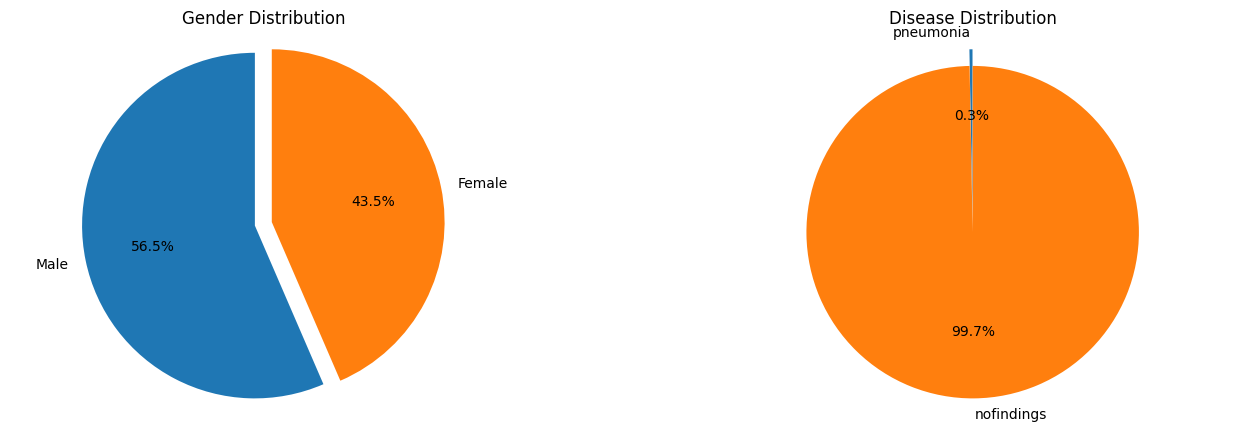

In [59]:
import matplotlib.pyplot as plt

print("NIH Data Distribution")
# Create subplots
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9, wspace=0.4, hspace=0.6)
# Plot the first pie chart
axes[0].pie([percent_male, percent_female], labels=['Male', 'Female'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Gender Distribution')

axes[1].pie([percent_pneumonia, percent_nofindings], labels=['pneumonia', 'nofindings'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Disease Distribution')

# Display the plot
plt.show()

In [60]:
relabeled_df = df.copy()
for idx in range(len(relabeled_df)):
    if "pneumonia" in relabeled_df.iloc[idx,1].lower():
        relabeled_df.iloc[idx,1] = "pneumonia"
    else:
        relabeled_df.iloc[idx,1] = "no findings"

In [61]:
relabeled_df[relabeled_df.columns[1]].unique()
relabeled_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,no findings,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,no findings,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,no findings,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,no findings,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,no findings,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,no findings,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,no findings,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,no findings,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [62]:
males, females = relabeled_df[relabeled_df[relabeled_df.columns[5]] == "M"], relabeled_df[relabeled_df[relabeled_df.columns[5]] == "F"]
pneumonia = relabeled_df[(relabeled_df[relabeled_df.columns[1]] == "pneumonia")]
nofindings = relabeled_df[(relabeled_df[relabeled_df.columns[1]] != "pneumonia")]

In [63]:
# Gender Distribution
total = len(males) + len(females)
percent_male, percent_female = (len(males) / total) * 100, (len(females) / total) * 100

# Disease Distribution
total = len(pneumonia) + len(nofindings)
percent_pneumonia, percent_nofindings = (len(pneumonia) / total) * 100, (len(nofindings) / total) * 100

NIH Data Distribution


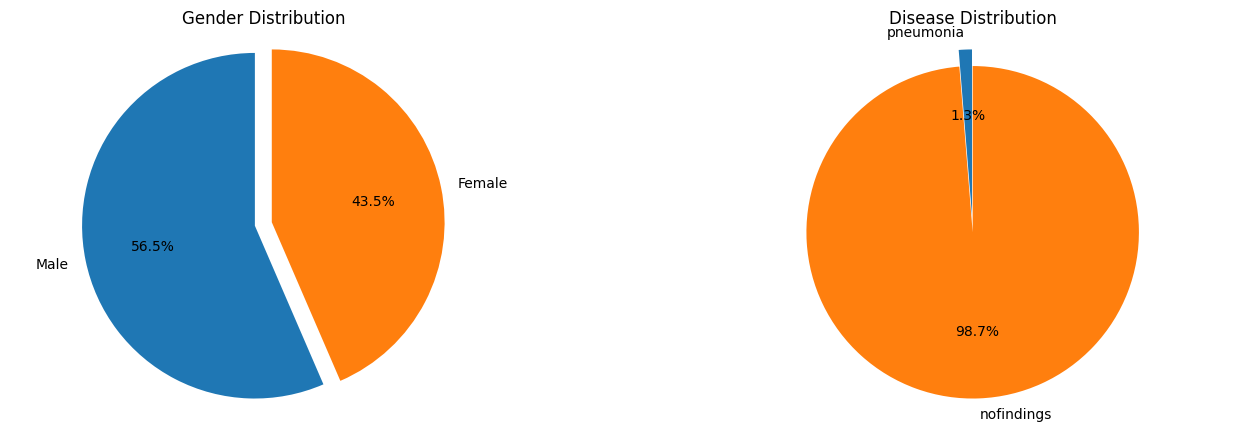

In [64]:
print("NIH Data Distribution")
# Create subplots
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9, wspace=0.4, hspace=0.6)
# Plot the first pie chart
axes[0].pie([percent_male, percent_female], labels=['Male', 'Female'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Gender Distribution')

axes[1].pie([percent_pneumonia, percent_nofindings], labels=['pneumonia', 'nofindings'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Disease Distribution')

# Display the plot
plt.show()

## Visualize RSNA Data

In [80]:
import os

path2rsna = "./datasets/rsna/"
rsna_names = os.listdir(path2rsna)
rsna_names = [name for name in rsna_names if ".png" in name]
len(rsna_names)

30000

In [81]:
from tqdm import tqdm

tmp = relabeled_df.copy()
rsna_col = []

for idx in tqdm(range(len(tmp))):
    if tmp.iloc[idx,0] in rsna_names:
        rsna_col.append(1)
    else:
        rsna_col.append(0)

100%|██████████| 112120/112120 [00:38<00:00, 2912.79it/s]


In [82]:
tmp["rsna"] = rsna_col # add rsna column to tmp
rsna_df = tmp[tmp["rsna"] == 1]
rsna_df.to_csv('./datasets/rsna_patients.csv', index=False) # Save RSNA Dataframe

In [83]:
# split rsna_df into gender and disease subgroups
males, females = rsna_df[rsna_df[rsna_df.columns[5]] == "M"], rsna_df[rsna_df[rsna_df.columns[5]] == "F"]
pneumonia = rsna_df[(rsna_df[rsna_df.columns[1]] == "pneumonia")]
nofindings = rsna_df[(rsna_df[rsna_df.columns[1]] != "pneumonia")]

# Gender Distribution
total = len(males) + len(females)
percent_male, percent_female = (len(males) / total) * 100, (len(females) / total) * 100

# Disease Distribution
total = len(pneumonia) + len(nofindings)
percent_pneumonia, percent_nofindings = (len(pneumonia) / total) * 100, (len(nofindings) / total) * 100

RSNA Data Distribution


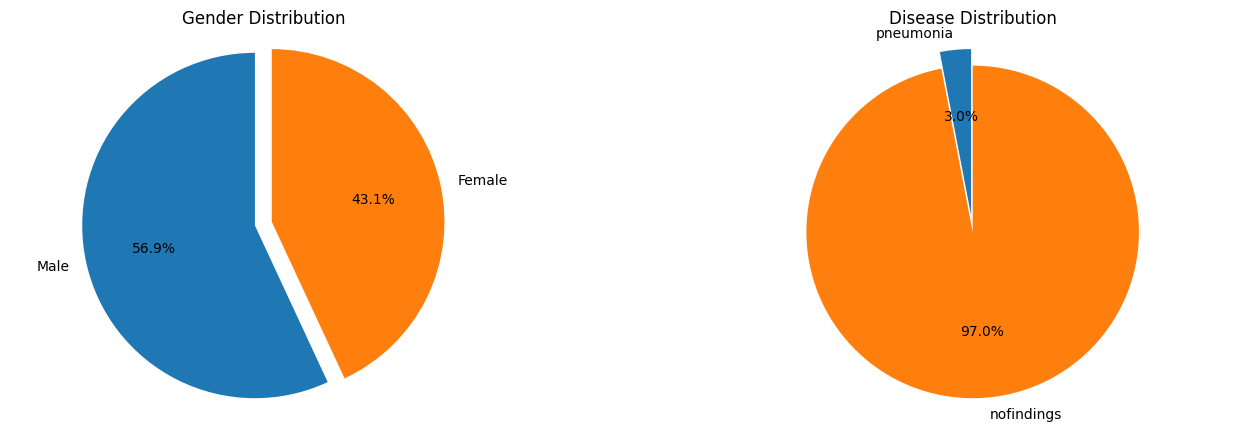

In [84]:
print("RSNA Data Distribution")
# Create subplots
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9, wspace=0.4, hspace=0.6)
# Plot the first pie chart
axes[0].pie([percent_male, percent_female], labels=['Male', 'Female'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Gender Distribution')

axes[1].pie([percent_pneumonia, percent_nofindings], labels=['pneumonia', 'nofindings'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Disease Distribution')

# Display the plot
plt.show()

In [98]:
dataset = pd.read_csv("./pneumonia_dataset/stage_2_train_labels.csv")
df = pd.DataFrame(dataset)
len(df)
# df[df[df.columns[5]] == "M"]

30227

In [99]:
import json

with open('pneumonia-challenge-dataset-mappings_2018.json', 'r') as file:
    data = file.read()
    
parsed_data = json.loads(data)

In [100]:
rsna_names = []
patient_map = {}
for i in range(len(parsed_data)):
    patient_map[parsed_data[i]['subset_img_id']] = parsed_data[i]['img_id']

In [104]:
rsna_df = df[df['patientId'].isin(patient_map.keys())]
len(rsna_df)

30227

## Save Training CSV

In [123]:
tmp = df.copy()
for idx in range(len(tmp)):
    if tmp.iloc[idx,0] not in patient_map:
        print(f"issue with {tmp.iloc[idx,1]}...")
    else:
        tmp.iloc[idx,0] = patient_map[tmp.iloc[idx,0]]
tmp

,patientId,x,y,width,height,Target
0,00019124_092.png,NaN,NaN,NaN,NaN,0
1,00028640_003.png,NaN,NaN,NaN,NaN,0
2,00016550_019.png,NaN,NaN,NaN,NaN,0
3,00006123_005.png,NaN,NaN,NaN,NaN,0
4,00020673_042.png,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,00029502_003.png,185.0,298.0,228.0,379.0,1
30223,00011921_002.png,NaN,NaN,NaN,NaN,0
30224,00024731_000.png,NaN,NaN,NaN,NaN,0
30225,00020213_073.png,570.0,393.0,261.0,345.0,1


In [124]:
print("Training Dataset: ",len(tmp[tmp.columns[0]].unique()))
tmp[["patientId", "Target"]].to_csv('./datasets/train_rsna.csv', index=False) # Save RSNA Dataframe

Training Dataset:  26684


## Visualize Training Data

In [113]:
# split rsna_df into gender and disease subgroups
males, females = rsna_df[rsna_df[rsna_df.columns[5]] == "M"], rsna_df[rsna_df[rsna_df.columns[5]] == "F"]

rsna_df = df.copy()
pneumonia = rsna_df[(rsna_df[rsna_df.columns[-1]] == 1)]
nofindings = rsna_df[(rsna_df[rsna_df.columns[-1]] != 1)]

# # Gender Distribution
# total = len(males) + len(females)
# percent_male, percent_female = (len(males) / total) * 100, (len(females) / total) * 100

# Disease Distribution
total = len(pneumonia) + len(nofindings)
percent_pneumonia, percent_nofindings = (len(pneumonia) / total) * 100, (len(nofindings) / total) * 100

RSNA Data Distribution


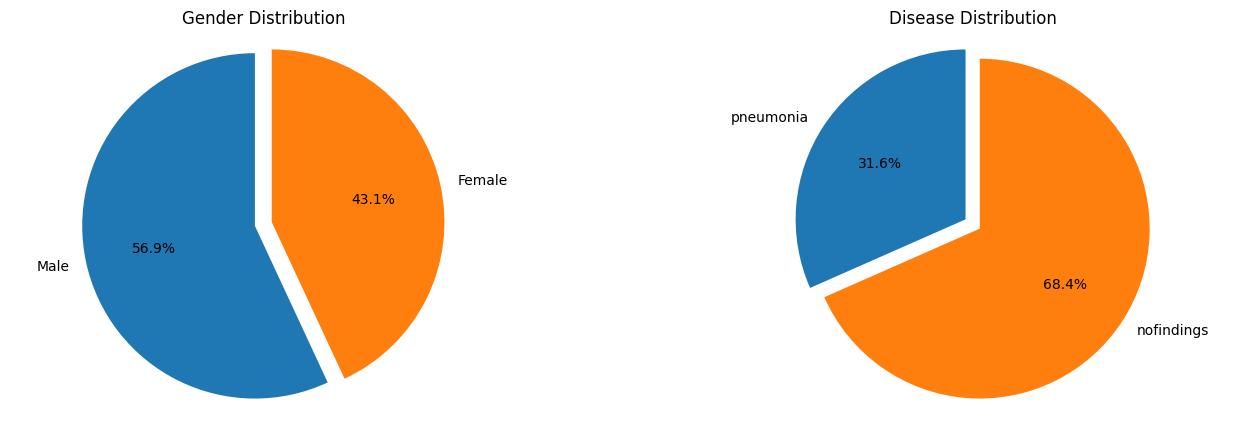

In [114]:
print("RSNA Data Distribution")
# Create subplots
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9, wspace=0.4, hspace=0.6)
# Plot the first pie chart
axes[0].pie([percent_male, percent_female], labels=['Male', 'Female'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Gender Distribution')

axes[1].pie([percent_pneumonia, percent_nofindings], labels=['pneumonia', 'nofindings'], explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Disease Distribution')

# Display the plot
plt.show()

## Get Testing Data

In [160]:
# load csv files
total_rsna = pd.read_csv("./datasets/rsna_patients.csv")
nih, train_rsna = pd.read_csv("./3/Data_Entry_2017.csv"), pd.read_csv("./datasets/train_rsna.csv")
# convert to dataframe
total_rsna, nih, train_rsna = pd.DataFrame(total_rsna), pd.DataFrame(nih), pd.DataFrame(train_rsna)
total_rsna, nih = total_rsna[["Image Index"]], nih[["Image Index", "Finding Labels"]]

In [155]:
# Return rows found in RSNA but not in train_rsna (i.e. rest are test images)
test_rsna = nih[(nih["Image Index"].isin(total_rsna["Image Index"])) & ~(nih["Image Index"].isin(train_rsna["patientId"]))]
len(test_rsna)

3316

In [227]:
train, test = os.listdir("./pneumonia_dataset/stage_2_train_images"), os.listdir("./pneumonia_dataset/stage_2_test_images")
train_ids, test_ids = [name.split('.')[0] for name in train], [name.split('.')[0] for name in test]
train_ids, test_ids = [patient_map[name] for name in train_ids], [patient_map[name] for name in test_ids]
print(train_ids[0])

00008468_058.png


In [228]:
# load csv files
total_rsna = pd.DataFrame(pd.read_csv("./3/Data_Entry_2017.csv"))
test_df = total_rsna[total_rsna["Image Index"].isin(test_ids)]
train_df = total_rsna[total_rsna["Image Index"].isin(train_ids)]
train_df, test_df = train_df[["Image Index", "Finding Labels"]], test_df[["Image Index", "Finding Labels"]]

In [229]:
labels = test_df["Finding Labels"].unique()
labels = [label for label in labels if "pneumonia" in label.lower()]

In [230]:
test_df[test_df["Finding Labels"].isin(labels)]

,Image Index,Finding Labels
253,00000056_000.png,Nodule|Pneumonia
614,00000150_002.png,Atelectasis|Infiltration|Pneumonia
4703,00001255_031.png,Infiltration|Pneumonia
4928,00001317_002.png,Pneumonia
5673,00001529_002.png,Pneumonia
...,...,...
106598,00028764_003.png,Infiltration|Pneumonia
108627,00029469_012.png,Edema|Effusion|Infiltration|Pneumonia
110916,00030249_001.png,Infiltration|Pneumonia
111088,00030323_015.png,Consolidation|Pneumonia|Mass


In [231]:
test_df.loc[(test_df['Finding Labels'].isin(labels)), 'Finding Labels'] = 1
test_df.loc[(~test_df['Finding Labels'].isin(labels)) & (test_df['Finding Labels'] != 1), 'Finding Labels'] = 0

In [235]:
test_df[test_df["Finding Labels"] == 0]

,Image Index,Finding Labels
22,00000007_000.png,0
44,00000013_006.png,0
127,00000032_013.png,0
155,00000032_041.png,0
172,00000032_058.png,0
...,...,...
112018,00030733_006.png,0
112025,00030740_000.png,0
112035,00030748_000.png,0
112063,00030764_000.png,0


In [236]:
test_df.to_csv('./datasets/test_rsna.csv', index=False) # Save RSNA Dataframe